# Código

En este Notebook se encuentra todo el código utilizado en este trabajo. Cada uno de los puntos del enunciado del Trabajo Práctico esta marcado explícitamente.

# Imports y set-up del Notebook

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')

# Funciones y Valores Principales

In [2]:
n = 12*30    # Número de períodos
P = round(102840/700, 2)  # Aporte mensual
A = 200000   # Monto meta

def F(x):                 # Función principal a estudiar.
    return P/x * ((1+x)**n-1) - A

def g1(x):               # Método 1
    return x - ((P/x)*(((1+x)**n)-1)-A)
def g2(x):               # Método 2
    return (((A*x/P)+1)**(1/n))-1
def g3(x):               # Método 3
    return (P/A)*(((1+x)**n)-1)
def g4(x):                # Método 4
    return ((A/P*x + 1) / (1 + x)**(n/2))**(2/n) - 1
def g5(x):                # Método 5 - NR
    return x - ((x-g1(x)) / ((-P/x**2)*(((1+x)**n)-1) + (P*n/x)*((1+x)**(n-1))))

funciones = [g1, g2, g3, g4, g5]  #lista con todas las funciones que va a ser utilizada en el iterador

# A2

#### Enunciado: 

Estudie la función dada para determinar el entorno donde se encuentra la raíz buscada (realice un gráfico o una pequeña tabla). 

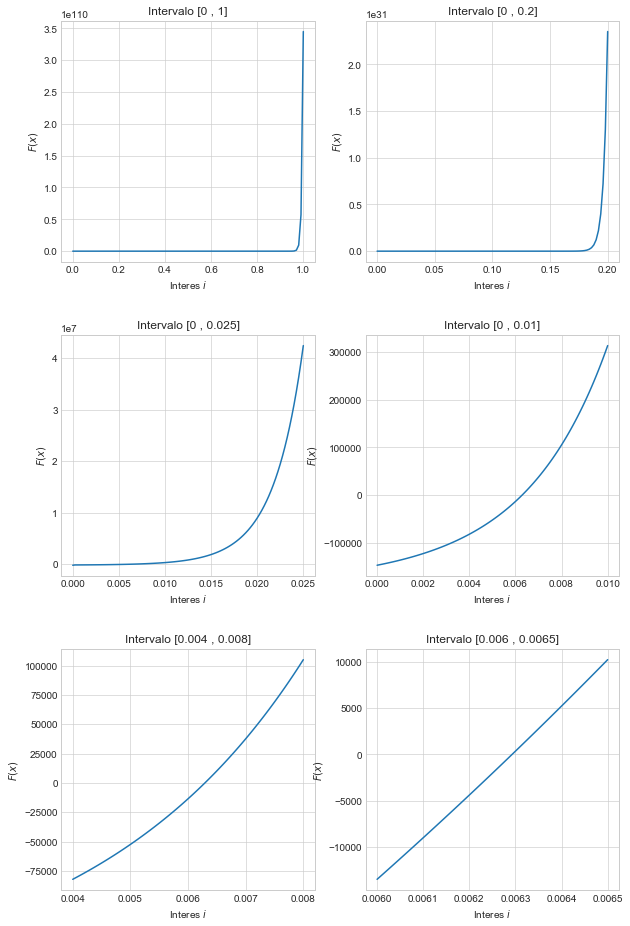

In [3]:
fig = plt.figure(figsize=(10,16))  # creo la figura
plt.subplots_adjust(hspace=0.3)    # ajusto el espacio horizontal entre graficos

ax1 = plt.subplot(321)            # selecciono el par de ejes 1 de 6
i = np.linspace(1e-30, 1, 101)    # defino el intervalo a graficar. 
ax1.plot(i, F(i))                 # no arranca desde cero porque se estaria dividiendo por 0
plt.grid(alpha=0.8)
plt.xlabel('Interes $i$')
plt.ylabel('$F(x)$')
plt.title('Intervalo [0 , 1]')

ax2 = plt.subplot(322)
i = np.linspace(1e-30, 0.2, 101) #Intervalo [0 , 0.2]
ax2.plot(i, F(i))
plt.grid(alpha=0.8)
plt.xlabel('Interes $i$')
plt.ylabel('$F(x)$')
plt.title('Intervalo [0 , 0.2]')


ax3 = plt.subplot(323)
i = np.linspace(1e-30, 0.025, 101)   #Intervalo [0 , 0.025]
ax3.plot(i, F(i))
plt.grid(alpha=0.8)
plt.xlabel('Interes $i$')
plt.ylabel('$F(x)$')
plt.title('Intervalo [0 , 0.025]')


ax4 = plt.subplot(324)
i = np.linspace(1e-5, 0.01, 101)       #Intervalo [0 , 0.01]
ax4.plot(i, F(i))
plt.grid(alpha=0.8)
plt.xlabel('Interes $i$')
plt.ylabel('$F(x)$')
plt.title('Intervalo [0 , 0.01]')


ax5 = plt.subplot(325)
i = np.linspace(0.004, 0.008, 101)
ax5.plot(i, F(i))
plt.grid(alpha=0.8)
plt.xlabel('Interes $i$')
plt.ylabel('$F(x)$')
plt.title('Intervalo [0.004 , 0.008]')  #Intervalo [0.004 , 0.008]

ax6 = plt.subplot(326)
i = np.linspace(0.006, 0.0065, 101)     #Intervalo [0.006 , 0.0065]
ax6.plot(i, F(i))
plt.grid(alpha=0.8)
plt.xlabel('Interes $i$')
plt.ylabel('$F(x)$')
plt.title('Intervalo [0.006 , 0.0065]')


#fig.savefig('figura1.png')


# B2

#### Enunciado:

Desarrolle un programa computacional que utilice los 5 algoritmos propuestos. Trabaje en
simple precisión y utilice un criterio de corte para errores relativos menores a 10-5. 


In [4]:
def punto_fijo(x0, gnum, tol=1e-5):
    '''Toma una semilla y el numero de metodo (1 a 5) e itera hasta alcanzar 
    la tolerancia deseada. Trabaja en simple precision'''
    
    x_sig = np.float32(funciones[gnum - 1](x0))  #x_sig es el x sub k+1
    R = np.abs(x_sig -x0) / x_sig                # calcula el error relativo
    while tol < R:
        x = x_sig                # x guarda el valor anterior para luego calcular el error como la diferencia
        x_sig = np.float32(funciones[gnum - 1](x))
        R = np.abs(x_sig - x) / x_sig
    return x_sig

In [5]:
punto_fijo(1e80,2)   #prueba

0.0062928204

# B3

#### Enunciado:
Estudie en forma experimental las propiedades de convergencia de cada uno de los
algoritmos propuestos. Para ello corra el programa para diferentes valores del punto inicial x0
(semilla) y determine explícitamente los respectivos intervalos de convergencia. Empiece con
un intervalo no menor que [0,5X, 2X] siendo X un valor aproximado (a partir de A.2) de la raíz
buscada. Complete la siguiente tabla:

#### Metodología:
Se creó un array de prueba y se lo evaluo. Observando que valores convergieron acotamos cada vez más el intervalo. Luego lo cargamos en una matriz llamada "Mm" (por Maximos y minimos).

In [6]:


r = np.linspace(1e-8,1e-7, 10, dtype='float32')  #creamos un array de prueba. Genera diez valores dentro de un intervalo
M = np.empty(len(r), dtype='float32')

for i in range(len(r)):
    M[i] = punto_fijo(r[i],5)       # Evaluamos cada punto de r
    

list(zip(r, M))   # Imprime todas las semillas, y sus respectivos resultados tras ser iterados. 
                  # Miramos a ojo cuales convergen y partir de eso seguimos acotando

[(1e-08, 0.006292786),
 (2e-08, 0.006292786),
 (3e-08, 0.006292786),
 (4e-08, 0.006292786),
 (5e-08, 0.006292786),
 (6e-08, 0.006292786),
 (7e-08, 0.006292786),
 (8e-08, 0.006292786),
 (9e-08, 0.006292786),
 (1e-07, 0.006292786)]

In [7]:
punto_fijo(0.001,5, tol=1e-5)  #pruebas

0.006292786

In [8]:
Mm= np.zeros((5,2), dtype='float32')  #Carga de la matriz Mm

Mm[0,0] = -np.inf #valor clave: No converge para ningun x0
Mm[0,1] = -np.inf

Mm[1,0] = 0
Mm[1,1] = 1e30  #En realidad converge para valores aun mas grandes. A los fines practicos no interesa.

Mm[2,0] = 0.00629275
Mm[2,1] = 0.00629282

Mm[3,0] = 0
Mm[3,1] = 0.01822359

Mm[4,0] = 0
Mm[4,1] = 6.0493827


tabla_mm =  pd.DataFrame(data=Mm, columns=['X min', 'X max'], index=range(1,6))
tabla_mm.index.name = 'Método'
tabla_mm

,X min,X max
Método,,
1,-inf,-inf
2,0.000000,1.000000e+30
3,0.006293,6.292820e-03
4,0.000000,1.822359e-02
5,0.000000,6.049383e+00


# B4

#### Enunciado:
De acuerdo a lo estudiado en B.3 emplee un punto de partida permitido y común a los 5
algoritmos. Muestre una tabla con los resultados numéricos obtenidos en las sucesivas
iteraciones para cada uno de ellos (aún sin convergencia): 

In [9]:
def pf_tabla_sp(x0, gnum, tol=1e-5):
    '''Itera el metodo 'gnum' hasta alcanzar la tolerancia deseada, partiendo de x0.
    Devuelve una lista con todos los resultados parciales
    Trabaja en simple precisión'''
    x_sig = np.float32(funciones[gnum - 1](x0))   #misma logica que la funcion punto_fijo
    R = np.abs(x_sig - x0) / x_sig                #crea una lista donde se van a guardar los resultados
    resultados = np.array([x_sig], dtype='float32')
    while tol < R:
        x = x_sig
        x_sig = np.float32(funciones[gnum - 1](x))
        resultados = np.append(resultados, x_sig)
        R = np.abs(x_sig - x) / x_sig
    return resultados


def tabla(x0, punto_fijo, dtype='float64'):
    '''Itera cada algoritmo hasta alcanzar la precision deseada y devuelve una tabla con los resultados'''
    
    #Armo una matriz con los resultados de cada iteracion hasta alcanzar la tolerancia deseada.
    #M es una lista de listas, donde cada sublista tiene una length distinta porque es la cantidad de pasos
    #hasta alcanzar la tolerancia deseada
    
    M = [[np.inf]]               #la primera lista es la del algortimo 1 que solo tiene un infinito
    for i in range(2,6):
        M.append(list(punto_fijo(x0, i)))
    
    #Como se va a presentar en una tabla, construyo una matriz "data" que complete con NaN la lista de cada algoritmo
    #asi todas tienen el mismo tamano
    
    l = np.empty(5, dtype='int32')  # creo una lista temporaria con la length de cada lista
    for i in range(5):
        l[i] = len(M[i])

    N = int(np.max(l))  #busco la lista mas larga

    data = np.empty(( N , 5), dtype=dtype)   #creo la matriz
    for i in range(5):
        data[:,i] = np.concatenate((M[i], np.array([None]*(N - l[i]))))  #a cada lista le agrego los NaN 
                                                                         #que le faltan para llegar a N


    metodos = ['Método 1', 'Método 2', 'Método 3', 'Método 4', 'Método 5']
    
    tabla = pd.DataFrame(data=data, columns=metodos, index=range(1,N+1))
    tabla.index.name = 'Iteración'
    
    if dtype == 'float64': pd.set_option('display.precision', 12)  #Cambia la precision para imprimir solo digitos significativos
                                                                   # Como en doble precision se trabaja con tol de 1e-10
                                                                   # Al hacer las cuentas resulta que son 12 decimales despues de la coma
        
    elif dtype == 'float32': pd.set_option('display.precision', 7) #mismo pero para simple precision,
                                                                   # hay que mostrar 7 decimales. 
                                                                   #(2 por los ceros en el decimo y centesimo + 5 de la tol 1e-5)
    
    return tabla

x0 = 0.001

tabla1 = tabla(x0,pf_tabla_sp, dtype='float32').iloc[0:15]  #definimos la tabla de B4 llamando a la funcion tabla
#solo seleccionamos las primeras 15 filas porque las que siguen son valores del metodo 3 convergiendo a 0

#tabla1.to_csv("tabla simple precision.csv")

tabla1

C:\Users\joaquin costa\miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in float_scalars
  if sys.path[0] == '':
C:\Users\joaquin costa\miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in float_scalars
  if sys.path[0] == '':
C:\Users\joaquin costa\miniconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


,Método 1,Método 2,Método 3,Método 4,Método 5
Iteración,,,,,
1,inf,0.0023896,3.1811275e-04,0.0037812,0.0122770
2,NaN,0.0040294,8.9112160e-05,0.0063352,0.0094391
3,NaN,0.0052068,2.3945613e-05,0.0062840,0.0073570
4,NaN,0.0058236,6.3594248e-06,0.0062946,0.0064356
5,NaN,0.0060997,1.6835946e-06,0.0062924,0.0062956
6,NaN,0.0062149,4.4534096e-07,0.0062929,0.0062928
7,NaN,0.0062616,1.1777448e-07,0.0062928,0.0062928
8,NaN,0.0062804,3.1144708e-08,0.0062928,NaN
9,NaN,0.0062878,8.2358902e-09,NaN,NaN


# C1 y C2

#### Enunciado:
Realice una figura mostrando el error relativo en función del número de iteración para cada
uno de los algoritmos (todas las curvas en la misma figura). 

#### Observación:
En las siguiente células se realizan los calculos para C1 y C2, pero no se grafican.

In [10]:
#En esta célula se trabaja todo en errores relativos

def pf_relN(x0, N, gnum):
    '''Devuelve una lista con el error relativo para cada iteracion de 1 a N'''
    x_sig = np.float32(funciones[gnum - 1](x0))
    R = np.abs(x_sig - x0) / x_sig
    resultados = np.empty(N, dtype='float32')
    resultados[0] = R
    for n in range(N-1):
        x = x_sig
        x_sig = np.float32(funciones[gnum - 1](x_sig))
        R = np.abs(x_sig - x) / x_sig
        resultados[n+1] = R
    return resultados

N=11  #Numero de iteraciones a realizar

#cargo la matriz con los errores relativos de cada algoritmo para cada iteracion
relativos = np.empty((N, 5))
for i in range(5):
    relativos[:,i] = pf_relN(x0, N, i+1)


L_rel = np.zeros((5,2)) # matriz con los datos m, b de cada recta, respecto de los errores relativos (escala log-log)

L_rel[4,0], L_rel[4,1] = np.polyfit(np.log(relativos[:6,4]), np.log(relativos[1:7,4]), 1)  
L_rel[3,0], L_rel[3,1] = np.polyfit(np.log(relativos[:10,3]), np.log(relativos[1:11,3]), 1)
L_rel[2,0], L_rel[2,1] = np.polyfit(np.log(relativos[:-1,2]), np.log(relativos[1:,2]), 1)
L_rel[1,0], L_rel[1,1] = np.polyfit(np.log(relativos[:-1,1]), np.log(relativos[1:,1]), 1)

C:\Users\joaquin costa\miniconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
C:\Users\joaquin costa\miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in float_scalars
  if sys.path[0] == '':
C:\Users\joaquin costa\miniconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [11]:
# En esta celula se trabaja solo con errores absolutos. Hacemos esto para verificar que las aproximaciones
# para determinar el orden de convergencia de los metodos dan lo mismo si se trabaja con errores relativos o absolutos

def pf_absN(x0, N, gnum):
    '''Devuelve una lista con el error absoluto para cada iteracion de 1 a N'''
    x_sig = np.float32(funciones[gnum - 1](x0))
    E = np.abs(x_sig - x0)
    resultados = np.empty(N)
    resultados[0] = E
    for n in range(N-1):
        x = x_sig
        x_sig = np.float32(funciones[gnum - 1](x_sig))
        E = np.abs(x_sig - x)
        resultados[n+1] = E
    return resultados


#cargo la matriz con los errores absolutos de cada algoritmo para cada iteracion
absolutos = np.empty((N, 5))
for i in range(5):
    absolutos[:,i] = pf_absN(x0, N, i+1)


L_abs = np.zeros((5,2)) # matriz con los datos m, b de cada recta, respecto de los errores relativos


L_abs[4,0], L_abs[4,1] = np.polyfit(np.log(absolutos[:6,4]), np.log(absolutos[1:7,4]), 1)
L_abs[3,0], L_abs[3,1] = np.polyfit(np.log(absolutos[:10,3]), np.log(absolutos[1:11,3]), 1)
L_abs[2,0], L_abs[2,1] = np.polyfit(np.log(absolutos[:-1,2]), np.log(absolutos[1:,2]), 1)
L_abs[1,0], L_abs[1,1] = np.polyfit(np.log(absolutos[:-1,1]), np.log(absolutos[1:,1]), 1)


C:\Users\joaquin costa\miniconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
C:\Users\joaquin costa\miniconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


#  Gráfico de C1

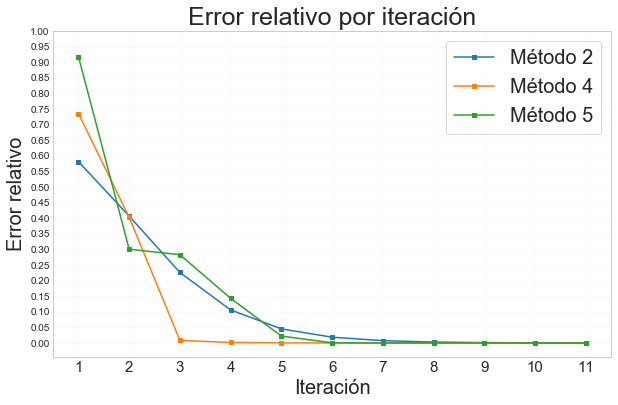

In [12]:
#grafico el punto C1. Error relativo por iteracion, partiendo de la semilla x0=0.001. 
#Graficamos solo los algoritmos 2 a 5 ya que el uno no converge. 
#El 3 lo graficamos aunque sepamos que no converge partiendo de x0, para que se aprecie como su error no disminuye con cada iteracion

metodos = ['Método 1', 'Método 2', 'Método 3', 'Método 4', 'Método 5']

fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(1, N, N, dtype=int)

for i in [1,3,4]:
    plt.plot(x, relativos[:,i], marker='s', ms=4, label=metodos[i])

plt.title('Error relativo por iteración', size=25)
plt.xlabel('Iteración', size=20)
plt.ylabel('Error relativo', size=20)
plt.legend(prop={'size':20}, frameon=True)
plt.yticks(np.linspace(0,1,21), size=10)
plt.xticks([i for i in range(1,N+1)], size=15)
plt.grid(alpha=0.1)

#plt.savefig('figura2')



#  Gráfico de C2

C:\Users\joaquin costa\miniconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


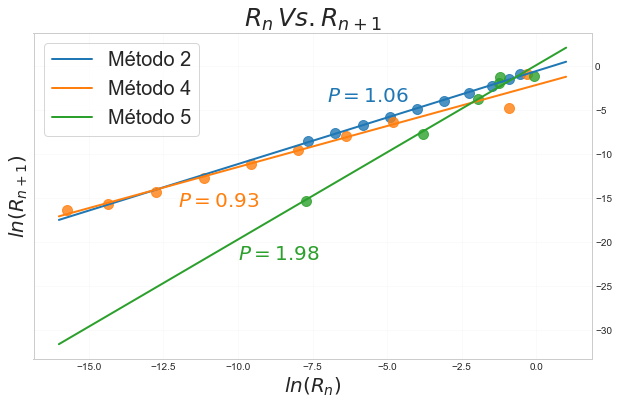

In [13]:
fig, ax=plt.subplots(figsize=(10,6))

#Ploteamos los puntos
plt.scatter(np.log(relativos[:-1,1]), np.log(relativos[1:,1]), s=100, alpha=0.8)
plt.scatter(np.log(relativos[:-1,3]), np.log(relativos[1:,3]), s=100, alpha=0.8)
plt.scatter(np.log(relativos[:-1,4]), np.log(relativos[1:,4]), s=100, alpha=0.8)


#ploteamos las rectas de ajuste
x = np.linspace(-16,1,3)
y2 = x * L_rel[1,0] + L_rel[1,1]
y4 = x * L_rel[3,0] + L_rel[3,1]
y5 = x * L_rel[4,0] + L_rel[4,1]

plt.plot(x, y2, lw=2)
plt.plot(x,y4, lw=2)
plt.plot(x, y5, lw=2)
    
#Detalles esteticos
plt.legend(np.array(metodos)[[1,3,4]], frameon=True, prop={'size': 20})
plt.tick_params(labelright=True, labelleft=False)
plt.xlabel('$ln(R_{n})$', size=20)
plt.ylabel('$ln(R_{n+1})$', size=20)
plt.title('$R_{n} \, Vs. R_{n+1}$', size=25)
plt.grid(alpha=0.1)

plt.text(-10, -22, f'$P={round(L_rel[4,0],2)} $', color='C2', size=20)
plt.text(-12, -16, f'$P={round(L_rel[3,0],2)} $', color='C1', size=20)
plt.text(-7, -4, f'$P={round(L_rel[1,0],2)} $', color='C0', size=20)

    
#plt.savefig('figura3.png')


In [14]:
#Verificamos que da lo mismo si se trabaja con errores relativos o absolutos. 
#La primera columna de L_rel y L_abs deben ser similares para los algoritmos 2, 4 y 5

L_rel

array([[ 0.        ,  0.        ],
       [ 1.05764389, -0.58819504],
       [ 0.30278039,  0.71356298],
       [ 0.93338571, -2.17016201],
       [ 1.9823379 ,  0.08476231]])

In [15]:
L_abs

array([[ 0.        ,  0.        ],
       [ 1.10491133,  0.23511188],
       [ 1.01262377, -1.13223012],
       [ 0.94479276, -2.30610124],
       [ 1.87837678,  3.96417326]])

# C3

In [16]:
def pf_tabla_dp(x0, gnum, tol=1e-10):
    '''Itera el metodo 'gnum' hasta alcanzar la tolerancia deseada, partiendo de x0.
    Devuelve una lista con todos los resultados parciales
    Trabaja en doble precisión'''
    x_sig = funciones[gnum - 1](x0)
    R = np.abs(x_sig - x0) / x_sig
    resultados = np.array([x_sig])
    while tol < R:
        x = x_sig
        x_sig = funciones[gnum - 1](x)
        resultados = np.append(resultados, x_sig)
        R = np.abs(x_sig - x) / x_sig
    return resultados

tabla2 = tabla(x0, pf_tabla_dp)  #llamamos a la funcion definida en B4

#tabla2.to_csv('tabla2.csv')
tabla2

C:\Users\joaquin costa\miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
C:\Users\joaquin costa\miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


,Método 1,Método 2,Método 3,Método 4,Método 5
Iteración,,,,,
1,inf,0.002389642950,3.181127513634e-04,0.003781215079,0.012276966388
2,NaN,0.004029410796,8.911216008466e-05,0.006335186673,0.009439078088
3,NaN,0.005206776821,2.394561312730e-05,0.006284016404,0.007357044552
4,NaN,0.005823640990,6.359424982647e-06,0.006294574866,0.006435626710
5,NaN,0.006099672178,1.683594739860e-06,0.006292420203,0.006295555103
6,NaN,0.006214899162,4.453409965715e-07,0.006292860921,0.006292787166
7,NaN,0.006261632600,1.177744969279e-07,0.006292770818,0.006292786114
8,NaN,0.006280366734,3.114471080125e-08,0.006292789241,0.006292786114
9,NaN,0.006287841709,8.235891079735e-09,0.006292785475,NaN


# D2

#### Enunciado:
Realizar un análisis de la variación que puede sufrir la cuenta al momento de retiro, siendo
que los rendimientos reales y la capacidad de poder realizar los aportes pueden cambiar. Para
ello, aplicar la técnica de perturbaciones experimentales para hallar una cota del delta de la
cuenta (A), asumiendo una variación de los rendimientos de +/- 30% (Ri) y +/- 10% para los
aportes (RP). 

In [17]:
def A(P, x):   #Definimos la funcion principal, ahora dependiente de mas parametros
    return P / x * ((1+x)**n - 1)

i = 0.006292786114  #resultado con mayor presicion obtenido


perturbaciones = np.array([A(P, i*1.3), A(P, i*0.7), A(P*1.1, i), A(P*0.9, i)]) #lista con cada perturbacion(positivas y negativas)
relativas = (perturbaciones - A(P,i)) / A(P,i)  #lista con cada error relativo

data = np.vstack((perturbaciones,relativas))  
tabla3 = pd.DataFrame(data=data, columns=['$i + 30%$', '$i - 30%$', '$P + 10%$', '$P - 10%$'],
                         index=['Resultado Perturbado', 'Error Relativo de la Perturbacion']) #imprime una tabla con los resultados

tabla3
#tabla3.to_csv('perturbaciones experminetales.csv') 

,$i + 30%$,$i - 30%$,$P + 10%$,$P - 10%$
Resultado Perturbado,319382.984061864729,128939.859808313588,220000.000001031818,180000.000000844215
Error Relativo de la Perturbacion,0.596914920302,-0.355300700961,0.100000000000,-0.100000000000


In [18]:
cpi = np.abs(relativas[0] / 0.3)  #calculo de cpi
cpP = np.abs(relativas[2] / 0.1)  #calculo de cpP

cp = cpi + cpP   #calculo del Cp global

cp


2.9897164010061132

#### Unidad de Maquina:

El minimo valor mayor a 0 que puede representar un tipo de dato np.float64 es:

In [19]:
np.finfo(np.float64).eps

2.220446049250313e-16

# D3

#### Enunciado:
Determine cuál debería ser la tasa de rendimiento anual para alcanzar una cuenta con 1
millón de dólares al cabo de 30 años, si se mantienen los aportes planificados originalmente.

In [20]:
A = 1000000  # Nueva meta

#Corremos el programa en doble precision y determinamos i_1m

i_1m = round(pf_tabla_dp(0.001, 4, tol=1e-10)[-1], 12)   

i_1m*12  #interes anual

0.149272146036

In [21]:
F(i_1m)  #verificamos. Da casi 0.

4.276691470295191e-05